Basic EDA, inspecting language in text and subreddit activity in time

In [1]:
%config Completer.use_jedi = False
# https://stackoverflow.com/questions/40536560/ipython-and-jupyter-autocomplete-not-working

In [121]:
import pandas as pd
from pprint import pprint
data_path = "../data/reddit_wsb.csv"

In [127]:
df = pd.read_csv(data_path, keep_default_na=False)
df = df.sort_index()
print(df.info()); df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25647 entries, 0 to 25646
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      25647 non-null  object 
 1   score      25647 non-null  int64  
 2   id         25647 non-null  object 
 3   url        25647 non-null  object 
 4   comms_num  25647 non-null  int64  
 5   created    25647 non-null  float64
 6   body       25647 non-null  object 
 7   timestamp  25647 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 1.6+ MB
None


,title,score,id,url,comms_num,created,body,timestamp
0,"It's not about the money, it's about sending a...",55,l6ulcx,https://v.redd.it/6j75regs72e61,6,1.611863e+09,,2021-01-28 21:37:41
1,Math Professor Scott Steiner says the numbers ...,110,l6uibd,https://v.redd.it/ah50lyny62e61,23,1.611862e+09,,2021-01-28 21:32:10
2,Exit the system,0,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,47,1.611862e+09,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,29,l6ugk6,https://sec.report/Document/0001193125-21-019848/,74,1.611862e+09,,2021-01-28 21:28:57
4,"Not to distract from GME, just thought our AMC...",71,l6ufgy,https://i.redd.it/4h2sukb662e61.jpg,156,1.611862e+09,,2021-01-28 21:26:56
...,...,...,...,...,...,...,...,...
25642,It's a sign from above!,141,lbzlpf,https://i.redd.it/3sx9fl2a3cf61.jpg,32,1.612419e+09,,2021-02-04 08:01:56
25643,Hold GME 🚀🚀🚀,742,lbzie2,https://i.redd.it/5eoajgdb4cf61.png,46,1.612418e+09,,2021-02-04 07:58:28
25644,AMC Yolo Update — Feb 3 2021,555,lbzi1b,https://i.redd.it/sc31mce84cf61.jpg,38,1.612418e+09,,2021-02-04 07:57:59
25645,Its not a loss unless you sell,597,lbzf18,https://i.redd.it/qmcqjwoh3cf61.png,40,1.612418e+09,,2021-02-04 07:54:39


The id is unique

In [128]:
df.id.nunique() == df.shape[0]

True

So let's use that as the row identifier.

In [129]:
df = df.set_index("id"); df

,title,score,url,comms_num,created,body,timestamp
id,,,,,,,
l6ulcx,"It's not about the money, it's about sending a...",55,https://v.redd.it/6j75regs72e61,6,1.611863e+09,,2021-01-28 21:37:41
l6uibd,Math Professor Scott Steiner says the numbers ...,110,https://v.redd.it/ah50lyny62e61,23,1.611862e+09,,2021-01-28 21:32:10
l6uhhn,Exit the system,0,https://www.reddit.com/r/wallstreetbets/commen...,47,1.611862e+09,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35
l6ugk6,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,29,https://sec.report/Document/0001193125-21-019848/,74,1.611862e+09,,2021-01-28 21:28:57
l6ufgy,"Not to distract from GME, just thought our AMC...",71,https://i.redd.it/4h2sukb662e61.jpg,156,1.611862e+09,,2021-01-28 21:26:56
...,...,...,...,...,...,...,...
lbzlpf,It's a sign from above!,141,https://i.redd.it/3sx9fl2a3cf61.jpg,32,1.612419e+09,,2021-02-04 08:01:56
lbzie2,Hold GME 🚀🚀🚀,742,https://i.redd.it/5eoajgdb4cf61.png,46,1.612418e+09,,2021-02-04 07:58:28
lbzi1b,AMC Yolo Update — Feb 3 2021,555,https://i.redd.it/sc31mce84cf61.jpg,38,1.612418e+09,,2021-02-04 07:57:59


Look at "words"(as defined by str.split) in posts. Look at those that are common and uncommon, and look at very long vs very short ones.

In [159]:
texts = df["title"] + " " + df["body"]
split_texts = texts.str.split()
max_string_lengths = split_texts.map(lambda L: list(map(len, L))).map(max)
ddf = pd.DataFrame({
    "text": texts, 
    "split_texts": split_texts,
    "max_string_len": max_string_lengths
})

ddf = ddf.sort_values("max_string_len", ascending=False)

In [160]:
word_counts = (ddf[["split_texts"]]
               .explode("split_texts")
               .value_counts())

In [171]:
# the N most common words
N = 500; print(f"The {N} most common words:")
pprint([l[0] for l in list(word_counts[:N].index)], compact=True); print("\n\n")
N = 500; print(f"The {N} least common words:")
pprint([l[0] for l in list(word_counts[-N:].index)],compact=True)

The 500 most common words:
['the', 'to', 'and', 'a', 'of', 'is', 'I', 'in', 'that', 'you', 'for', 'on',
 'this', 'are', 'it', 'have', 'they', 'not', 'be', 'GME', 'with', 'we', 'but',
 'at', 'will', 'all', 'my', 'as', 'their', 'can', 'from', 'or', 'your', 'The',
 'just', 'buy', 'if', 'was', 'This', 'THE', 'like', 'what', 'by', 'up', 'out',
 'shares', 'about', 'has', 'so', 'do', 'more', 'short', 'get', 'Robinhood',
 'stock', 'market', 'an', 'some', 'people', '-', 'We', 'If', 'them', 'going',
 'know', 'price', 'They', 'me', "I'm", 'these', '🚀', 'because', 'who', 'our',
 'been', 'only', 'money', 'when', 'us', 'would', 'now', 'AMC', 'still', 'other',
 'make', 'how', 'into', 'one', 'no', 'TO', 'there', 'HOLD', 'down', 'sell',
 'than', 'hedge', 'go', '&#x200B;', 'trading', 'want', 'any', 'even', 'think',
 'see', 'time', 'fucking', 'back', 'You', "don't", 'over', 'am', 'buying',
 'were', 'BUY', 'I’m', 'AND', 'need', 'could', 'A', 'stocks', 'funds',
 'financial', 'new', 'should', 'which', 'hold

In [187]:
N = 100; print(f"{N} posts with no long strings: ")
pprint(list(ddf.iloc[-N:].text), compact=True); print("\n\n")
N = 3; print(f"The {N} posts with the longest strings: ")
print(*[ddf.iloc[i].text for i in range(N)], sep="\n" + "-"*80 + "\n")

100 posts with no long strings: 
['🚀🚀🚀 ', 'GTE 🚀 ', ':’( ', 'RUH ROH ', 'BUY GME ', 'lol ', '🚀🚀🚀 ', 'Amc ? ',
 '🤡🤡🤡 ', 'Am I 💎🤲 yet 🚀🚀🚀 ', 'BUY THE DIP 🚀🚀🚀 ', 'Got em ', 'BUY AMC NOW 🚀🚀🚀 ',
 'DTC 😡🤬 ', 'Who is it? ', "Ok, I'm in ", 'Wtf ', 'AMC and NOK ', '💎🙌🏼 ',
 'GME GME GME ', 'ONE OF US ', 'BUY THE DIP ', '🙌💎🙌 ', 'lol ', 'NOK ! NOK !',
 'WSB rn ', 'Uh oh. ', 'BUY GME NOW BUY GME NOW', 'WE DID IT 🎉🎉🎉 ', 'lol ',
 'NOK BUY THE DIP ', '💎🤲💎 ', 'Buy buy buy AMC NOK BB AAL ', '💎 🙌 All The Way ',
 'WE ALL IN NOW 🚀🚀🚀 AMC 🚀🚀🚀 💎👐 ', 'WTF ', 'LLY ', 'RIG ', 'IN IT TO WIN IT ',
 'Yup ', 'WSB 1 MEL 0 ', 'XQC ONE OF US ONE OF US ', 'ONE OF US? ', 'Go amc ! ',
 'IF I BUY YOU CAN TOO ',
 '$AG $AG $AG $AG $AG $AG $AG $AG $AG $AG $AG $AG $AG $AG $AG $AG $AG $AG $AG '
 '$AG $AG $AG $AG $AG $AG $AG $AG $AG $AG $AG $AG $AG $AG $AG $AG $AG $AG $AG '
 '$AG $AG $AG $AG $AG $AG $AG $AG $AG $AG $AG $AG $AG $AG $AG $AG $AG $AG $AG '
 '$AG $AG $AG $AG $AG $AG $AG $AG $AG $AG $AG $AG $AG $AG $AG $AG $AG $AG $AG

## Some words that might require special handling: 
- common: 🚀; &#x200B; 💎; @; #; /
- uncommon: situations with missing space after punctuattion; words with weird capitalization; long hyperlinks (esp with pattern ](hyperlink))
- long strings:  seeem to be URL's
- short strings: common phrases; strings of emojis'; all characters sepearted by space (seem safe to ignore, but could handle as special case).

Now treat data as time series:

In [7]:
df_pd = pd.read_csv(data_path, 
                 index_col="timestamp", 
                 parse_dates=True, 
                 keep_default_na=False)
# df_pd = df_pd.assign(timestamp=pd.to_datetime(df_pd.timestamp))
df_pd = df_pd[["id", "title", "body"]]
df_pd.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 25647 entries, 2021-01-28 21:37:41 to 2021-02-04 07:54:27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      25647 non-null  object
 1   title   25647 non-null  object
 2   body    25647 non-null  object
dtypes: object(3)
memory usage: 801.5+ KB


In [8]:
# # In three cases I checked, the comms_num field is an ovestimate (by maybe 5%?) of the actual number of comments on the post.
# # Here are some of the most popular posts:
# df.iloc[(-df.comms_num).argsort()].head(10)

<AxesSubplot:xlabel='timestamp'>

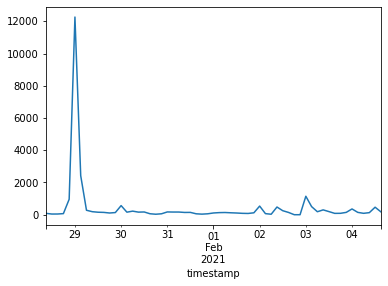

In [9]:
# activity measured by number of new posts
resampler = df["id"].resample("3h")
ddf = resampler.count()
ddf.plot()

<AxesSubplot:xlabel='timestamp'>

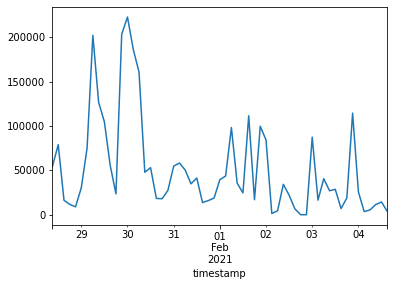

In [10]:
# activity measured by number of comments
resampler = df["comms_num"].resample("3h")
ddf = resampler.sum()
ddf.plot()

I want to train on the body of a number of posts from a given time window and watch how some indicators of sentiment change. I need to make sure that there are a reasonable number of posts in each window for this to matter. Spikes of high activity are fine.

In [11]:
# to actually divide by time range
bins = pd.cut(df.index, ddf.shape[0], 
              labels=list(range(ddf.shape[0])))
vcs = bins.value_counts()
print(vcs.describe())
# How many bins have less than 50 comments?
vcs[vcs<100]

count       59.000000
mean       434.694915
std       1656.618463
min          0.000000
25%         85.500000
50%        143.000000
75%        209.000000
max      12725.000000
dtype: float64


0     87
1     43
2     41
3     69
18    60
19    30
20    58
26    57
27    37
28    57
34    88
35    79
38    93
39     0
43     0
44     0
50    95
51    84
55    58
dtype: int64

In [10]:
# # check that the id is just a component of the reddit.com address
# prefix = "https://www.reddit.com/r/wallstreetbets/comments/"
# ddf = df.assign(url = df.url.str.extract(prefix + "(\w{6})/.*")); ddf